# MA3001B




In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## 5.5.5 ARIMA MODELS

ARIMA models describe stochastic processes with a MA component, an AR component and a trend. When applying ARIMA models to a time series, choosing the proper parameters, one can use the model to forecast the variable of interest representing the time series.

## Polynomials $\theta(B)$ and $\phi(B)$

Let's consider a moving average process of order $q$:

$X_t=Z_t+\theta_1Z_{t-1}+\theta_2Z_{t-2}+...+\theta_qZ_{t-q}$

By using the backshift operator B, such that

* $Z_{t-1}=BZ_t$
* $Z_{t-2}=B^2Z_t$
* ...
* $Z_{t-q}=B^qZ_t$

we can rewrite the MA(q) process as:

$X_t=(1+\theta_1B+\theta_2B^2+...+\theta_qB^q)Z_t=\theta(B)Z_t$

where we have renamed the "operator polynomial" $(1+\theta_1B+\theta_2B^2+..+\theta_qB^q)$ as $\theta(B)$.

Let's consider, now, an AR(p) process of order $p$:

$X_t=Z_t+\phi_1X_{t-1}+\phi_2X_{t-2}+..+\phi_pX_{t-p}$

and considering again the backshift operator B, such that:

* $X_{t-1}=BX_t$
* $X_{t-2}=B^2X_t$
* ...
* $X_{t-p}=B^pX_t$

We can rewrite the AR(p) process as:

$X_t=Z_t+\phi_1BX_t+\phi_2B^2X_t+...+\phi_pB^pX_t$

$(1-\phi_1B-\phi_2B^2-...-\phi_pB^p)X_t=Z_t=\phi(B)X_t=Z_t$

where we have renamed the "operator polynomial"  $(1-\phi_1B-\phi_2B^2-...-\phi_pB^p)$ as $\phi(B)$.


## ARMA(p,q) MODELS

ARMA models are used to describe processes that have a MA(q) component and an AR(p) component:

$X_t=Z_t+\phi_1X_{t-1}+\phi_2X_{t-2}+..+\phi_pX_{t-p}+\theta_1Z_{t-1}+\theta_2Z_{t-2}+...+\theta_qZ_{t-q}$

which can be rewritten as:

$\theta(B)Z_t=\phi(B)X_t$

Since we know how to deal with MA processes, the goal is to transform an ARMA model into a MA process of infinite order. We can write:

$\frac{\theta(B)}{\phi(B)}Z_t=\psi(B)Z_t=X_t$

$Z_t=\frac{\phi(B)}{\theta(B)}X_t=\pi(B)X_t$

and use these expressions to write the ARMA model as an infinite AM process or an infinite AR process.



## Example: simulation of an ARMA(p,q) model

We simulate the ARMA(1,1) process:

$X_t=Z_t+0.1X_{t-1}+0.2Z_{t-1}$


c:\Users\gusal\miniconda3\envs\Ambiente-Conda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


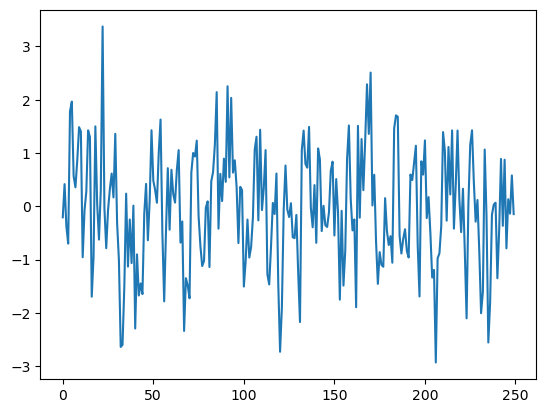

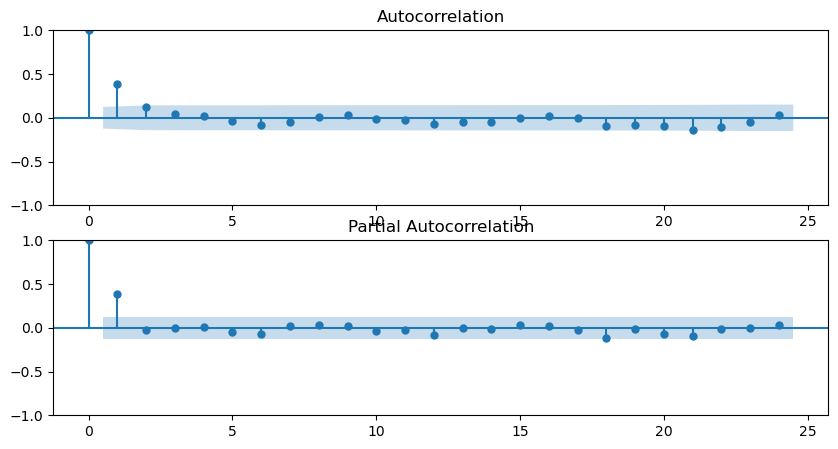

In [9]:
import statsmodels.api as sm

np.random.seed(12345)
arparams = np.array([.1]) #coefficients array AR(p)
maparams = np.array([.2]) #coefficients array MA(q)
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)
y = arma_process.generate_sample(250)

plt.plot(y)

fig, ax = plt.subplots(2,1,figsize=(10,5))
plot_acf(y,ax=ax[0])
plot_pacf(y,ax=ax[1])
plt.show()

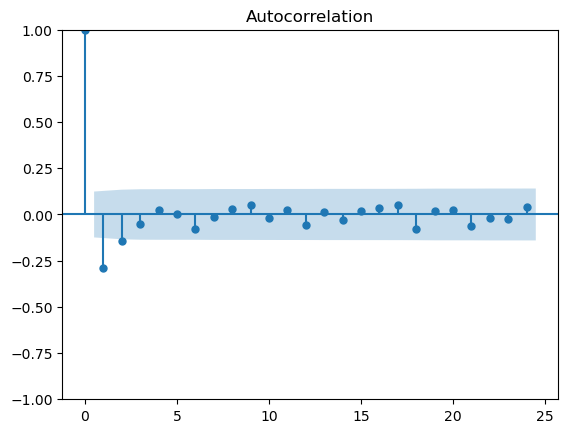

In [10]:
from statsmodels.tsa.statespace.tools import diff
plot_acf(diff(y))
plt.show()

## ARIMA (p,d,q) processes

ARIMA stands for Autoregressive Integrated Moving Average Processes. For these kind of precesses we take into account a trend in the time series, that can be removed using the difference operator $1-B$ where $B$ is the backshift operator:

$\nabla X_t=X_t-X_{t-1}=(1-B)X_t$

For example, the random walk:

$X_t=X_{t-1}+Z_t$

can be written:

$\nabla X_t=Z_t$

If we consider an ARIMA(p,d,q) process $X_t$, we can decompose it in an ARMA(p,q) process $Y_t$ resulting after applying the difference operator d times:

$Y_t=\nabla^d X_t=(1-B)^d X_t$

Therefore, we can write the ARIMA(p,d,q) process as:

$\phi(B)\nabla^d X_t=\theta(B)Z_t$

or equivalently:

$\phi(B)(1-B)^d X_t=\theta(B)Z_t$

Usually, differencing is applied 1 or 2 times. Analyzing the ACFs we can understand if a differencing is needed. Usually when differencing is needed we observe a slowly decaying pattern in the ACFs.
A trend in the time series also suggests that differencing is needed, but also other transformations may be needed (as log transformation) when variation in variance is observed.
In principle, when we analyze an ARIMA(p,d,q) we follow this procedure:

* log tranformation
* differencing (1 or 2 times)
* from ACF we can guess the order q of MA process
* from PACF we can guess the order p of AR process
* using several metrics as AIC, SSE and Ljung-Box Q-statistics we can evaluate the quality of the model.



## Simulation of ARIMA(pd,q) model

https://github.com/TOMILO87/time_series_simulation

In [11]:
def ARIMA(phi = np.array([0]), theta = np.array([0]), d = 0, t = 0, mu = 0, sigma = 1, n = 20, burn = 10):
    """ Simulate data from ARMA model (eq. 1.2.4):

    z_t = phi_1*z_{t-1} + ... + phi_p*z_{t-p} + a_t + theta_1*a_{t-1} + ... + theta_q*a_{t-q}

    with d unit roots for ARIMA model.

    Arguments:
    phi -- array of shape (p,) or (p, 1) containing phi_1, phi2, ... for AR model
    theta -- array of shape (q) or (q, 1) containing theta_1, theta_2, ... for MA model
    d -- number of unit roots for non-stationary time series
    t -- value deterministic linear trend
    mu -- mean value for normal distribution error term
    sigma -- standard deviation for normal distribution error term
    n -- length time series
    burn -- number of discarded values because series beginns without lagged terms

    Return:
    x -- simulated ARMA process of shape (n, 1)

    Reference:
    Time Series Analysis by Box et al.
    """

    # add "theta_0" = 1 to theta
    theta = np.append(1, theta)

    # set max lag length AR model
    p = phi.shape[0]

    # set max lag length MA model
    q = theta.shape[0]

    # simulate n + q error terms
    a = np.random.normal(mu, sigma, (n + max(p, q) + burn, 1))

    # create array for returned values
    x = np.zeros((n + max(p, q) + burn, 1))

    # initialize first time series value
    x[0] = a[0]

    for i in range(1, x.shape[0]):
        AR = np.dot(phi[0 : min(i, p)], np.flip(x[i - min(i, p) : i], 0))
        MA = np.dot(theta[0 : min(i + 1, q)], np.flip(a[i - min(i, q - 1) : i + 1], 0))
        x[i] = AR + MA + t

    # add unit roots
    if d != 0:
        ARMA = x[-n: ]
        m = ARMA.shape[0]
        z = np.zeros((m + 1, 1)) # create temp array

        for i in range(d):
            for j in range(m):
                z[j + 1] = ARMA[j] + z[j]
            ARMA = z[1: ]
        x[-n: ] = z[1: ]

    return x[-n: ]



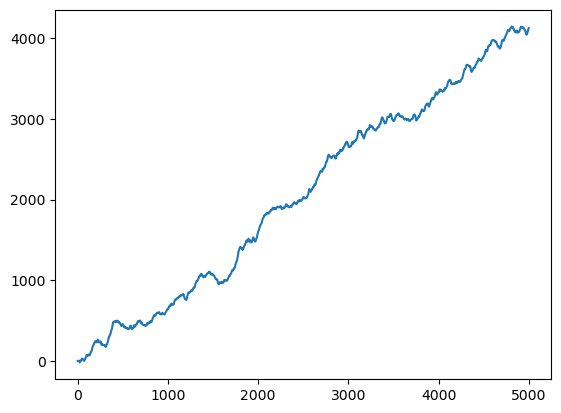

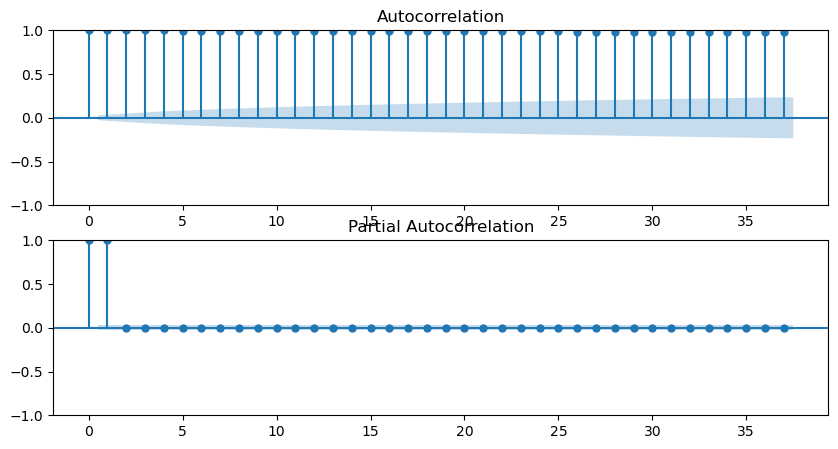

In [12]:
phi = np.array([0.8]) # AR part using 1 lag
theta = np.array([0.6]) # MA part using 1 lag
n = 5000 # number of simulated values
np.random.seed(2) # to get comparable results

x = ARIMA(phi = phi, theta = theta, d=1,t=0.2,n = n) # simulate time series
#sacf(x, k = 2, print_sacf = True) # calculate sacf and print 2 lags
plt.plot(x)

fig, ax = plt.subplots(2,1,figsize=(10,5))
plot_acf(x,ax=ax[0])
plot_pacf(x,ax=ax[1])
plt.show()

## Analysis of ARIMA processes

When we collect time series data, we don't know which kind of process it represents. Analyzing the ACF and PACF we can make a guess of the kind of process, i.e. of the order (p,q) of the AR and MA processes and use an ARIMA(p,q) model to fit the data. In general, we can try several models and choose the best one. We can measure the quality of the fit calculating the Sum of Squared Errors (SSE) or other metrics, as the Akaike Information Criterion (AIC).
We would like to build models with the SSE as low as possible, but also a model as simple as possible. The AIC criterion gives credit to a model which reduces the SSE, but also gives a penalty to a model with too may parameters. The AIC statistics can be written in different forms, the orginal form, published in the 1974 (https://ieeexplore.ieee.org/document/1100705) is:

𝐴𝐼𝐶 = −2 ⋅ log(𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑙𝑖𝑘𝑒𝑙𝑖ℎ𝑜𝑜𝑑) + 2 ⋅ (𝑛𝑢𝑚𝑏𝑒𝑟 𝑜𝑓 𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠 𝑖𝑛 𝑡ℎ𝑒 𝑚𝑜𝑑𝑒𝑙)

The first term correspond to the credit given for a low value of SSE, the second term is the penalty on the number of parameters. We want to minimize the AIC, so, when comparing different models, we will choose the one with the lowest value of AIC statistic.




## Ljung-Box test

The Ljung-Box test is a statistical test used to check whether there is autocorrelation in a time series. The Ljung-Box test is based on ah hypothesis test on the Q statistic:

$Q(m)=T(T+2)\displaystyle\sum_{l=1}^m \frac{r_l^2}{T-l}$

where T is the length of the series and $r_l$ are the autocorrelation coefficients at different lags.

The null hypothesis that all the autocorrelation coefficients of the $m$ terms are 0:

* $H_0:\,\,\,\rho_1=\rho_2=\rho3=...=\rho_m=0$

The alternative hypothesis is that at least one autocorrelation coefficient is not 0:

* $H_1:\,\,\,\rho_i\ne 0\,\,\,\,i \in\{1,2,3,...,m\}$

The Q statistics is asintotically distrubuted as a $\chi^2(df=m)$, so the Q statistic is compared to the $100(1-\alpha)$-th quantile of $\chi^2$ distribution and the null hypothesis is rejected when:

$Q(m)>\chi_\alpha^2$

or when the corresponding p-value is lower than $\alpha$ ($p<\alpha$).
When the null hypothesis is rejected, we conclude that there is autocorrelation.

Usually one takes $m=ln(T)$.

## EXAMPLE ON REAL DATASET

We will build an ARIMA model for the famous "Daily female births in California in 1959".

In [13]:
#!pip install pmdarima

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller # to do ADF test

from statsmodels.tsa.stattools import kpss

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA # to do predictions
from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima # a wrapper
import requests, io #type: ignore

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv"
s = requests.get(url).content
#def parser(x):
    #return pd.datetime.strptime(x,'%Y-%m-%d')
    #from statsmodels.tsa.stattools import adfuller, kpss

birth = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col=0, parse_dates=[0])

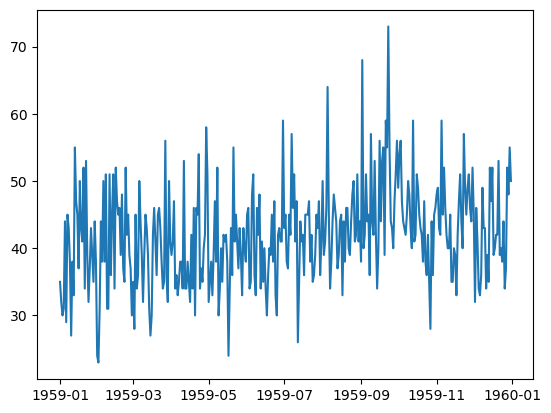

In [15]:
plt.plot(birth)
plt.show()


We perform the Q-test to check whether there is autocorrelation in the series to use an ARIMA model.

In [16]:
from statsmodels.stats.diagnostic import acorr_ljungbox


Since the p-value is very small we conclude that there is autocorrelation in the series.
We can observe from the plot that there is a light trend in the series, so we use differencing to remove the trend.

In [17]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()

    #Dickey_Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

    #kpss test:
    print('Results of kpss Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

We apply the diff:

In [18]:
from statsmodels.tsa.statespace.tools import diff


Check for stationarity

Apply the Q-test again

Now, let's check the ACF:

Let's check the PACF

First model: (once you set d=1, you apply the model to the original series)

In [19]:
import statsmodels.api as sm





Let's check the residuals:

Q-test on residuals:

Let's calculate SSE:

Let's try a second model:

Check the residuals, calculate Q-box test p-value

Calculate SSE

Let's try a third model:

Residuals

SSE

Let's consider the model ARIMA(1,1,1) which is the one with the lowest AIC:

## AutoARIMA

It is possible to use an automatic procedure to fine the best model. The procedure tests the series to find the order of differencing and fits the series with several models.


